<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 19**

## **Contenido**

- <a href="#mod"> Modelos probabilísticos</a><br>
- <a href="#nai"> Naive Bayes</a><br> 
  - <a href="#gau"> Naive Bayes Gausiano</a><br>
  - <a href="#mul"> Naive Bayes Multinomial</a><br>





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline

from mlxtend.plotting import plot_decision_regions

<p><a name="mod"></a></p>

# **Modelos probabilísticos**


El ML, al igual que la estadística, tiene que lidiar con la incertidumbre, por lo que muchos de sus métodos se formulan en un leguaje probabilístico o como modelos probabilísticos. 

Los modelos probabilísticos entienden los datos de entrada $(x, y)$ y los parámetros $\mathbf{w}$ como variables aleatorias extraídas de una distribución de probabilidad subyacente $p(x, y)$ (*ground truth*)











![](https://i.imgur.com/Vld2H57.png)

De aquí, se puede calcular la probabilidad de una determinada etiqueta $y$ dada una observación $x$

$$p(y|x) = \frac{p(x,y)}{p(x)},$$ 

o la probabilidad de una observación $x$ dada una etiqueta $y$

$$p(x|y) = \frac{p(x,y)}{p(y)}$$


![](https://i.imgur.com/zdNjaDa.png)

Note que las distribuciones de probabilidad condicional $p(x|y = y_0)$ son simplemente "cortes" unidimensionales a través de la imagen bidimensional $p(x, y)$ para valores dados de $y_0$, que luego se dividen (renormalizan) por el valor de la distribución marginal $p(y)$ en $y = y_0$.

A partir de las expresiones anteriores se puede formular el teorema de Bayes:

$$
p(y|x) = \frac{p(x|y)\;p(y)}{p(x)} 
$$ 

que puede aplicarse también al caso de una variable discreta $y$ con $K$ posibles valores. La regla de Bayes relaciona las probabilidades condicionales y marginales entre sí.






Un modelo probabilístico se puede referir tanto a un *modelo generativo* como a un modelo *discriminativo*

* **Generativo**: Estos modelan cómo se generaron los datos para categorizar una instancia, o en otras palabras, intentan aprender explícitamente cómo se genera una instancia de una clase determinada. Formalmente, los algoritmos generativos intentan aprender la distribución de probabilidad conjunta
  
  $$p(x,y)$$
  
  a partir de la cual se puede obtener la probabilidad condicionada $p(y|x)$ con la cual se harán predicciones posteriormente. Una de las ventajas de los modelos generativos es que se puede usar $p(x,y)$ para generar nuevos datos similares a los datos existentes.

* **Discriminativo:** A un modelo discriminativo no le "importa" cómo se generaron los datos, simplemente categoriza una instancia determinada. Formalmente, estos modelos estiman cuál es la probabilidad de obtener una etiqueta $y$ dada una instancia $x$ (probabilidad condicionada)

  $$p(y|x)$$

  a partir de la cual se puede realizar una predicción.

Los modelos discriminativos intentan trazar fronteras de decisión en el espacio de las características, mientras que los modelos generativos intentan modelar cómo se disponen los datos en este espacio. 

No existe un paradigma de modelado intrínsecamente mejor, las dos clases se ven como complementarias o como visiones diferentes del mismo procedimiento, y solo la experimentación decidirá cuál usar.

Un ejemplo de modelo discriminativo es la regresión logística, y un ejemplo de modelo generativo es el de Naive Bayes.


<p><a name="nai"></a></p>

# **Naive Bayes**

Los clasificadores *Naive Bayes* se construyen sobre métodos de clasificación bayesianos, los cuales se dan en términos del teorema de Bayes. En la clasificación bayesiana, estamos interesados en encontrar la probabilidad de una etiqueta $y_k$ dada una observación $\mathbf{x}_i$ $p(y_k|\mathbf{x}_i)$(*probabilidad posterior*)

$$
p(y_k|\mathbf{x}_i) = \frac{p(\mathbf{x}_i|y_k)\;p(y_k)}{p(\mathbf{x}_i)},
$$

donde $\mathbf{x}_i$ es la instancia i-ésima y $y_k$ la etiqueta $k$ (de $K$ clases). En este contexto, se conoce a $p(y_k)$ como la *probabilidad a priori*, que contiene la información que tenemos de la etiqueta $y_k$. $p(\mathbf{x}_i|y_k)$ es la verosimilitud (*likelihood*) de obtener $\mathbf{x_i}$ observada la etiqueta $y_k$. 


Los datos $\mathbf{x}$ pueden tener muchas dimensiones y tener distribuciones de probabilidad muy complicadas. Se puede reducir significativamente la complejidad del problema si se asume que todas las características son independientes, lo cual significa que 

$$p(x^1, x^2,...,x^n|y_k)=p(x^1|y_k)\;p(x^2|y_k)\cdots p(x^n|y_k)=\prod_j p(x^j|y_k),$$

donde $x^j$ es la característica j-éisma de la instancia $\mathbf{x}_i$. De esta manera se encuentra que 

$$
p(y_k|\mathbf{x}_i) \propto p(y_k)\prod_j p(x^j|y_k)
$$

Usando esta expresión, podemos calcular el valor más probable de $y$ maximizando sobre $y_k$

$$
\hat y \approx \arg \max_{y_k} \; p(y_k|\mathbf{x}_i)  = \arg \max_{y_k} \; p(y_k)\prod_j p(x^j|y_k)
$$

El problema, entonces, es determinar $p(x^j|y_k)$ y $p(y_k)$. Normalmente, esto se hace a partir del conjunto de entrenamiento. Todo lo que necesitamos ahora es algún modelo mediante el cual podamos calcular $p(x^j|y_k)$ para cada etiqueta. Dicho modelo es un modelo generativo porque especifica el proceso aleatorio hipotético que genera los datos. Especificar este modelo generativo para cada etiqueta es la pieza principal del entrenamiento de un clasificador bayesiano. 

Generalmente esto es una tarea muy difícil, pero podemos simplificarla mediante el uso de algunos supuestos sobre la forma del modelo. Aquí es donde entra en juego lo *naive* (ingenuo) del algoritmo: si hacemos suposiciones ingenuas sobre el modelo generativo para cada etiqueta, podemos encontrar una aproximación del modelo generativo para cada clase y luego proceder con la clasificación bayesiana. Los diferentes tipos de clasificadores de Naive Bayes se basan entonces en diferentes suposiciones "ingenuas" sobre los datos.

<p><a name="gau"></a></p>

## **Naive Bayes Gausiano**

Quizás el clasificador Bayesiano más fácil de entender es el gaussiano, que se puede aplicar a datos continuos. En este caso, la suposición "ingenua" es que los datos de cada etiqueta se extraen de una distribución gaussiana simple

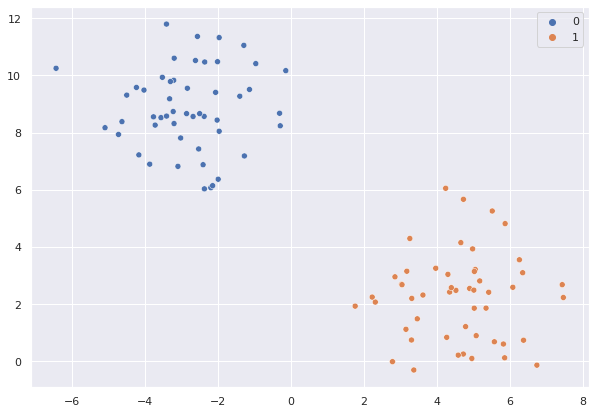

In [ ]:
X, y = make_blobs(100, 2, centers=2, random_state=42, cluster_std=1.5)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

Podemos ajustar este modelo simplemente encontrando la desviación estándar y la media de los datos para cada etiqueta que son los parámetros que definen la distribución gausiana

![](https://i.imgur.com/BYWWJ54.png)

Las elipses representan el modelo generativo gaussiano para cada etiqueta, con mayor probabilidad hacia el centro de las elipses. 

Con este modelo generativo implementado para cada clase, tenemos una receta simple para calcular las probabilidades $p(\mathbf{x}_i|y_k)$, y así podemos calcular rápidamente la probabilidad posterior y determinar qué etiqueta es la más probable para un punto dado.

Veamos esto por cada característica:

![](https://i.imgur.com/AVkDx3I.png)

![](https://i.imgur.com/q6Cwj9h.png)

Entrenemos el modelo utilizando el estimador `GaussianNB` de Sklearn:

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB().fit(X, y)

Veamos entonces cómo se da la clasificación con este modelo: Dada una nueva instancia

$$x = (x^1, x^2)$$

se calculan las probabilidades posteriores

$$p(y=0|x^1,x^2) = p(y=0)\; p(x^1|y=0) \; p(x^2|y=0)$$

$$p(y=1|x^1,x^2) = p(y=1)\; p(x^1|y=1) \; p(x^2|y=1)$$





donde $p(y=0)$ y $p(y=1)$ se calculan como el número de instancias de la clase negativa y positiva, respectivamente (información previa que tenemos de las clases). Por ejemplo, para la instancia (5, 2), las probabilidades posteriores de la primera y segunda etiqueta serán, respectivamente

In [ ]:
nb_clf.predict_proba([[5, 2]])

array([[4.29886086e-14, 1.00000000e+00]])

a partir de las cuales se realiza la predicción:

$$\hat y = \arg \max \big[p(y=0|x^1,x^2), \; p(y=1|x^1,x^2)\big]$$


In [ ]:
nb_clf.predict([[5, 2]])

array([1])

Veamos las regiones de decisión

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


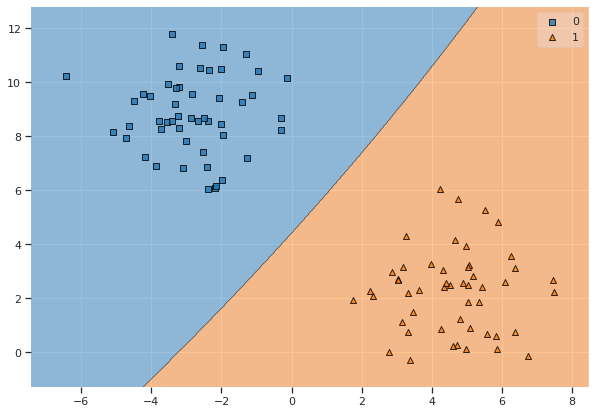

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_regions(X, y, nb_clf)

Entonces, si nuestro interés es el de estimar la incertidumbre en la clasificación, los enfoques bayesianos como este pueden ser útiles (al igual que la regresión logística).


<p><a name="mul"></a></p>

## **Naive Bayes Multinomial**

La suposición gausiana no es de ninguna manera la única suposición "ingenua" que podría usarse para especificar la distribución generativa para cada etiqueta. 

Otro ejemplo útil es el clasificador de Naive Bayes multinomial, donde se supone que las características se generan a partir de una distribución multinomial simple. La distribución multinomial describe la probabilidad de observar cierto conteo entre varias categorías y, por lo tanto, el NB multinomial es más apropiado para características que representan conteos. 

Un caso típico de uso del NB multinomial es en la clasificación de texto, donde las características están relacionadas con el recuento o frecuencia de las palabras dentro de los documentos que se van a clasificar.

Veamos un ejemplo de clasificación de texto: vamos a utilizar un conjunto de datos que contiene documentos con 20 grupos de noticias que vamos a querer clasificar según algunas categorias. 

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

Veamos las etiquetas del conjunto de datos

In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

veamos un ejemplo de dato

In [ ]:
print(data.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

correspondiente a la clase

In [ ]:
data.target_names[data.target[5]]

'talk.politics.guns'

El problema ahora es que los datos están en formato de texto. El algoritmo de clasificación necesita algún tipo de vector de características numéricas para realizar la tarea de clasificación. El enfoque más simple para esta tarea es el modelo de *bolsa de palabras* (bag of words), que nos permite representar datos de texto como características numéricas.

Para construir un modelo de bolsa de palabras basado en el recuento de palabras en los documentos, podemos usar el transformador `CountVectorizer` de Sklearn, que nos permite generar vectores con el conteo de palabras para cada documento:



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()

corpus = np.array(['this is the first document',
                 'this document is the second document',
                 'and this is the third one',
                 'is this the first document'])

bag = count.fit_transform(corpus)

en el atributo `vocabulary_` encontramos el mapeo que realiza el contador para cada palabra

In [ ]:
count.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'one': 4,
 'second': 5,
 'the': 6,
 'third': 7,
 'this': 8}

Esto genera una bolsa de palabras "dispersa" (*sparse*), un objeto similar a lo que se obtiene con la codificación *one hot*

In [ ]:
bag

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

podemos convertirlo a un arreglo para visualizar los vectores de conteo

In [ ]:
print(bag.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


El primer vector `[0 1 1 1 0 0 1 0 1]` corresponde al primer texto `'this is the first document'`. Aquí, el índice del vector (la posición de sus elementos), corresponde con el mapeo que obtuvimos con `count.vocabulary_`. 

La primera posición es `0`, lo que nos dice que la palabra "and" aparece cero veces en el texto; La segunda posición es `1`, lo que nos dice que la palabra "document" aparece una vez; etc. 

Si utilizamos la función `print` sobre `bag` obtenemos esta misma información para los elementos que aparecen al menos una vez:

In [ ]:
print(bag)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


La salida

>
    (0,8)    1

tiene la siguiente interpretación: Para el texto cero o primer texto (`'this is the first document'`), la palabra 8 ("this") aparece una vez.

Ahora, muchas veces nos vamos a encontrar con palabras que aparecen en varios documentos de cada clase con mucha frecuencia, por ejemplo ("is", "the" y "that"), y que normalmente no contienen información útil o discriminatoria. 

Podemos usar una técnica conocida como *term frequency-inverse document frequency* (Tfidf) para reducir el impacto de estas palabras (o tokens) con el transformador `TfidfTransformer` de Sklearn. 

Este agrega un peso adicional a los conteos, que se utiliza para evaluar la importancia de una palabra para un documento en un conjunto de documentos. La importancia aumenta proporcionalmente al número de veces que aparece una palabra en el documento, pero se compensa con la frecuencia de la palabra en el corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()

Apliquemos el transformador sobre la bolsa de palabras que ya tenemos

In [ ]:
print(tfidf.fit_transform(bag))

  (0, 8)	0.38408524091481483
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 2)	0.5802858236844359
  (0, 1)	0.46979138557992045
  (1, 8)	0.281088674033753
  (1, 6)	0.281088674033753
  (1, 5)	0.5386476208856763
  (1, 3)	0.281088674033753
  (1, 1)	0.6876235979836938
  (2, 8)	0.267103787642168
  (2, 7)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 4)	0.511848512707169
  (2, 3)	0.267103787642168
  (2, 0)	0.511848512707169
  (3, 8)	0.38408524091481483
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 2)	0.5802858236844359
  (3, 1)	0.46979138557992045


Sklearn implementa el transformador `TfidfVectorizer` que realiza las dos tareas descritas anteriormente. Utilicemos este junto con el estimador `MultinomialNB` para construir el modelo NB Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

nb_clf = make_pipeline(TfidfVectorizer(), MultinomialNB()).fit(data.data, data.target)

¿Cómo se da la predicción? La idea es exactamente la misma que en el caso gausiano, excepto que en lugar de modelar la distribución de datos con un ajuste gaussiano, modelamos la distribución de datos con una distribución multinomial.

dada una palabra $s$, calculamos su *likelihood* dada una clase $y_k$ de la siguiente manera

$$p(s|y_k) = \frac{\text{frequencia de la palabra s en la clase}\; y_k}{\text{numero total de palabras en la clase}\; y_k}$$

La probabilidad *a priori* la podemos calcular de los datos como: 

$$p(y_k) = \frac{\text{numero de documentos de la clase}\; y_k}{\text{numero total de documentos}}$$

por ejemplo, para la frase *hola mundo*, se calculan las probabilidades posteriores

$$p(y_k| \text{hola mundo}) = p(\text{hola, mundo}|y_k)\; p(y_k)=p(\text{hola}|y_k)\;p(\text{mundo}|y_k)\; p(y_k)$$

para cada clase $y_k$ y se elige el que tenga mayor probabilidad posterior para la predicción final.

Veamos la predicción del modelo para la frase `islam vs christians`

In [ ]:
pred = nb_clf.predict(["islam vs christians"])
data.target_names[pred[0]]

'soc.religion.christian'

Ambos estimadores de Naive Bayes tienen un hiperparámetro, `var_smoothing` y `alpha` respectivamente, que controlan la complejidad del modelo. Con estos valores que definen estos hiperparámetros (generalmente valores pequeños), el algoritmo agrega a los datos *puntos de datos virtuales* que tienen valores positivos para todas las características, de tal manera que si se utiliza un valor de característica que no estuvo en el dominio del conjunto de entrenamiento, la predicción no sea cero. Esto da como resultado un "suavizado" de las probabilidades. Un valor grande del hiperparámetro significa más suavizado, lo que resulta en modelos menos complejos. 

Los modelos de Naive Bayes comparten muchas de las fortalezas y debilidades de los modelos lineales: Son muy rápidos en el entrenamiento y en predección, y el procedimiento de entrenamiento es fácil de entender. 

Estos son excelentes modelos base. Particularmente, el modelo gausiano se usa normalmente en conjuntos de datos muy grandes, donde incluso el entrenamiento de un modelo lineal puede llevar demasiado tiempo.